In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [46]:
raw_res = {
 "fl":
      { "250": [0.4125,0.3799,0.4207,0.3986,0.4148],
        "500": [0.4711, 0.4696, 0.5018, 0.4726, 0.4804],
        "1000": [0.5477, 0.5485, 0.5349, 0.5549, 0.5454],
        "2000": [0.6615,0.6571,0.6775,0.6617],
        "4000": [0.7489,0.7515,0.747,0.7459],
        "8000": [0.8566,0.8626,0.8269,0.8176],
        "16000": [0.9109,0.9103,0.9194,0.9154],},
 "ind":
      { "250": [0.3641,0.3238,0.3573,0.3546,0.3711],
        "500": [0.4081,0.3835,0.4167,0.4044,0.4092],
        "1000": [0.4878,0.4744,0.527,0.4994,0.4937],
        "2000": [0.6024,0.5976,0.6035,0.5929],
        "4000": [0.7386,0.7355,0.7331,0.7204],
        "8000": [0.8351,0.7777,0.8366,0.8404],
        "16000": [0.8882,0.8909,0.8945,0.8609],},
 "cent":
      {  "250": [0.4081,0.3835,0.4167,0.4044,0.4092],
        "500": [0.4878,0.4744,0.527,0.4994,0.4937],
        "1000": [0.6024,0.5976,0.6035,0.5929],
        "2000": [0.7386,0.7355,0.7331,0.7204],
        "4000": [0.8351,0.7777,0.8366,0.8404],
        "8000": [0.8882,0.8909,0.8945,0.8609],
        "16000": [],},
}

In [57]:
x_axis = []
final_res = []
alg_names = ["FL", "Independent", "Centralized"]
for alg in ["fl", "ind", "cent"]:
    means = np.array([np.array(lst).mean() for lst in raw_res[alg].values()])
    std = [np.array(lst).std() for lst in raw_res[alg].values()]
    final_res.append((means, std))


/tmp/ipykernel_1820663/1449197649.py:5: RuntimeWarning: Mean of empty slice.
  means = np.array([np.array(lst).mean() for lst in raw_res[alg].values()])
/usr/lib/python3/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/lib/python3/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/lib/python3/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [58]:
list(raw_res["fl"].keys())

['250', '500', '1000', '2000', '4000', '8000', '16000']

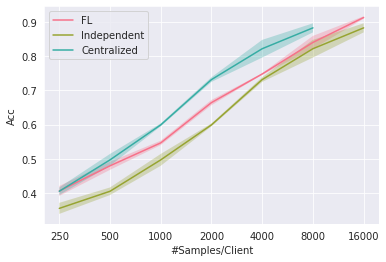

In [61]:
clrs = sns.color_palette("husl", 4)
resx_ = range(len(final_res[0][0]))
with sns.axes_style("darkgrid"):
    plt.xticks(resx_, list(raw_res["fl"].keys()))
    plt.ylabel("Acc")
    plt.xlabel("#Samples/Client")
    for i, result in enumerate(final_res):
        alg_name = alg_names[i]
        res_means_ = result[0]
        res_std_ = result[1]
        plt.plot(res_means_, c=clrs[i], label=alg_name)
        plt.fill_between(resx_, res_means_ - res_std_, res_means_ + res_std_, alpha=0.3, facecolor=clrs[i])
        plt.legend()
plt.savefig('cifar10.pdf', dpi=300)